In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = f"{3}"

In [3]:
import torch
import torch.nn as nn

import numpy as np
from torch.utils.data import Dataset, DataLoader

import torch.optim as optim

from torchvision import transforms
import joblib

/home/dg321/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

### Load flow data

### Load concatenated_data

In [81]:
concatenated_data = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/concatenated_data-1_1.npy")
# concatenated_data = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/sampelYs_stacked.npy")

# concatenated_data = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/FpB_Interpolated_t0_VelocityAbsorption_256_256.npy")
# concatenated_data = concatenated_data[0:1]

# concatenated_data = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult1024/FpB_Interpolated_t253_Velocity_1024_1024.npy")
# concatenated_data = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/InterpolatedResult256Raw/FpB_Interpolated_t253_Velocity_256_256.npy")

In [38]:
concatenated_data_revalued = concatenated_data.copy()
concatenated_data_revalued[concatenated_data > 1500] = 1
concatenated_data_revalued[concatenated_data <= 1500] = 0
concatenated_data = concatenated_data_revalued
print(concatenated_data.shape)

(1, 256, 256)


In [82]:
print(concatenated_data.shape)

(450, 256, 256, 2)


In [83]:
concatenated_data = concatenated_data.reshape(concatenated_data.shape[0], 2, 256, 256)

In [84]:
concatenated_data = concatenated_data.reshape(-1, 2, 256, 256)
print(concatenated_data.shape)

(450, 2, 256, 256)


In [39]:
concatenated_data = np.expand_dims(concatenated_data, axis=0)

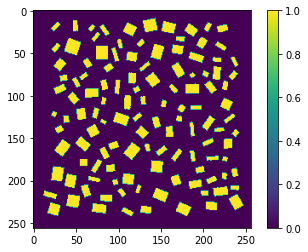

In [40]:
plt.imshow(concatenated_data[0,0,:,:])
plt.colorbar()

In [81]:
concatenated_data_list = []

dt = 5

for i in range(50):
    cd = concatenated_data[1 + i*dt,:,:, :]
    print(1 + i*dt)
    concatenated_data_list.append(cd)
data = np.stack(concatenated_data_list)

print(data.shape)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
(50, 2, 256, 256)


In [41]:
concatenated_data_list = []

dt = 20

for i in range(20):
    cd = concatenated_data[1 + i*dt,:,:]
    print(1 + i*dt)
    concatenated_data_list.append(cd)
concatenated_data = np.stack(concatenated_data_list)
print(concatenated_data.shape)

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
(20, 256, 256)


### Load concatenated_data_test51

In [4]:
concatenated_data_test51 = np.load("/home/dg321/gitTest/PRI/irp/Flow_Data/InterpolatedResult256/concatenated_data_test51.npy")

## Create data loader

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms

# Assuming you have a PyTorch DataLoader for your dataset (adjust the DataLoader creation according to your dataset)
# DataLoader should provide batches of images with shape (batch_size, 1, 1024, 1024)

data = concatenated_data
dataloader = DataLoader(data, batch_size=32, shuffle=True)

## Define the model

In [68]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(64, 8, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [72]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Flow

In [85]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Identity()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [25]:
# 2 channels
import torch
import torch.nn as nn

class ConvAutoencoder5Conv2ds(nn.Module):
    def __init__(self):
        super(ConvAutoencoder5Conv2ds, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 16, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.Conv2d(16, 32, kernel_size=2, stride=2, padding=0),  # Layer 2
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Layer 3
            nn.ReLU(True),
            nn.Conv2d(64, 32, kernel_size=2, stride=2, padding=0),  # Layer 4
            nn.ReLU(True),
            nn.Conv2d(32, 16, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.ReLU(True),
            nn.Conv2d(16, 16, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.ReLU(True),
            nn.Conv2d(16, 16, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.ReLU(True),
        )


        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 16, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 16, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 32, kernel_size=2, stride=2, padding=0),  # Layer 1
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 64, kernel_size=2, stride=2, padding=0),  # Layer 2
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Layer 3
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0),  # Layer 4
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 2, kernel_size=2, stride=2, padding=0),  # Layer 5
            nn.Identity()
        )

    def forward(self, x):
        print(x.shape)
        # x = x.view(16, 2, 9600, -1)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the autoencoder
autoencoder = ConvAutoencoder5Conv2ds()

# You can print the model to see its updated architecture
print(autoencoder)

ConvAutoencoder5Conv2ds(
  (encoder): Sequential(
    (0): Conv2d(2, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (7): ReLU(inplace=True)
    (8): Conv2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    (9): ReLU(inplace=True)
    (10): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
    (11): ReLU(inplace=True)
    (12): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
    (13): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): ConvTranspos

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Identity()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# # Instantiate the model, loss function, and optimizer
# autoencoder = Autoencoder()

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Identity()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:


# Define the autoencoder model
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()

#         # Encoder layers
#         self.encoder = nn.Sequential(
#             nn.Conv2d(2, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             # nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             # nn.MaxPool2d(kernel_size=2, stride=2)
#         )

#         # Decoder layers
#         self.decoder = nn.Sequential(
#             nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             # nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
#             nn.Conv2d(32, 2, kernel_size=3, stride=1, padding=1),
#             # nn.Sigmoid()  # To ensure output values are between 0 and 1
#             nn.Identity()
#         )

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         # Encoder
#         self.encoder = nn.Sequential(
#             nn.Conv2d(2, 16, kernel_size=2, stride=2, padding=0),  # Layer 1
#             nn.ReLU(True),
#             nn.Conv2d(16, 32, kernel_size=2, stride=2, padding=0),  # Layer 2
#             nn.ReLU(True),
#             nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Layer 3
#             nn.ReLU(True),
#         )


#         # Decoder
#         self.decoder = nn.Sequential(
#             nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Layer 3
#             nn.ReLU(True),
#             nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0),  # Layer 4
#             nn.ReLU(True),
#             nn.ConvTranspose2d(16, 2, kernel_size=2, stride=2, padding=0),  # Layer 5
#             nn.Identity()
#         )

#     def forward(self, x):
#         print(x.shape)
#         # x = x.view(16, 2, 9600, -1)
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2, padding=0),  # Change kernel_size and stride to 2
            nn.ReLU(),
            nn.ConvTranspose2d(32, 2, kernel_size=2, stride=2, padding=0),   # Change kernel_size and stride to 2
            nn.Identity()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## Train the model

In [88]:
# Instantiate the model, loss function, and optimizer
autoencoder = Autoencoder()
criterion = nn.MSELoss()  # Mean Squared Error loss works well for image reconstruction
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    for data in dataloader:
        inputs = data  # Assuming DataLoader provides batches of images
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        print(inputs.shape)
        print(outputs.shape)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([2, 2, 256, 256])
torch.Size([2, 2, 256, 256])
Epoch [1/2000], Loss: 0.5026
torch.Size([32, 2, 256, 256])
torch.Size([32, 2, 256, 256])
torch.Size([3

KeyboardInterrupt: 

In [65]:
# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    for data in dataloader:
        inputs = data  # Assuming DataLoader provides batches of images
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        print(inputs.shape)
        print(outputs.shape)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [1/2000], Loss: 0.0110
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [2/2000], Loss: 0.0114
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [3/2000], Loss: 0.0109
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [4/2000], Loss: 0.0116
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [5/2000], Loss: 0.0115
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [6/2000], Loss: 0.0114
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [7/2000], Loss: 0.0116
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [8/2000], Loss: 0.0111
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [9/2000], Loss: 0.0117
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [10/2000], Loss: 0.0109
torch.Size([1, 1, 256, 256])
torch.Size([1, 1, 256, 256])
Epoch [11/2000], Loss: 0.0117
torch.Size([1, 1, 256, 256])
torch.Size([

### Save trained model

In [75]:
torch.save(autoencoder.state_dict(), './models/autoencoder_Flow_Building_256_256_{}epochs.pth'.format(num_epochs))  ### PredictionMulti

## Load saved model

In [8]:
# Load the saved autoencoder
autoencoder = Autoencoder()  # Assuming you have the ConvAutoencoder class defined
# autoencoder.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/interpolation_code_example_2D/models/Velocity256_Compression_1000epochs_64batchsize_lr0.003_updatedLoss.pth'))
# autoencoder.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/interpolation_code_example_2D/models/Velocity256_Compression_1000epochs_32batchsize_lr0.003_updatedLoss.pth'))
# autoencoder.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/interpolation_code_example_2D/models/Velocity256_Compression_1000epochs_64batchsize_lr0.003_updatedLoss.pth'))
# autoencoder.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/interpolation_code_example_2D/models/Velocity256_Compression_1000epochs_32batchsize_lr0.003_OneFieldNew.pth'))
autoencoder.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/interpolation_code_example_2D/models/Velocity256_Compression_1500epochs_32batchsize_lr0.001_NewWorkingNN3_1-1.pth'))

autoencoder.eval()  # Set the autoencoder to evaluation mode

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(2, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU()
    (4): ConvTranspose2d(32, 2, kernel_size=(2, 2), stride=(2, 2))
    (5): Identity()
  )
)

## Generate result plots

(2, 256, 256)
latent space shape torch.Size([1, 64, 256, 256])
(1, 2, 256, 256)


<Figure size 432x288 with 0 Axes>

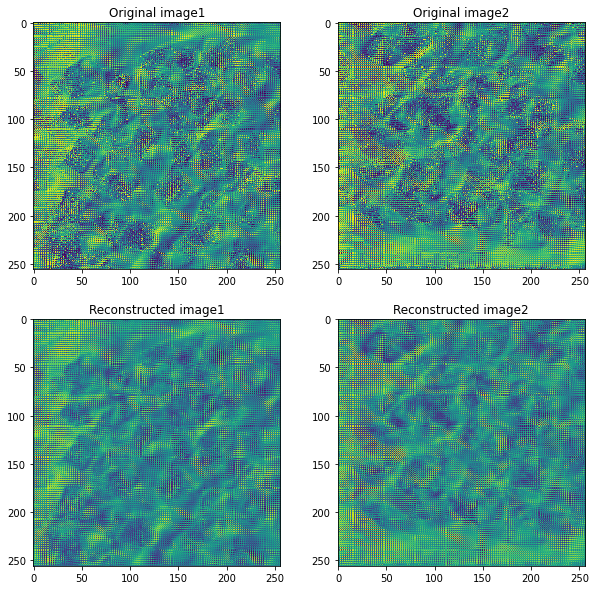

In [36]:
# Testing set

# dataP = samples_2steps[0]
dataP = concatenated_data[0]
# dataP = data[:2]
print(dataP.shape)

size_start = 0
size_end = 256

plt.figure()

f, axarr = plt.subplots(2,2, figsize=(10, 10))

sub1 = axarr[0][0].imshow(np.rot90(dataP[0, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][0].title.set_text('Original image1')

sub2 = axarr[0][1].imshow(np.rot90(dataP[1, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][1].title.set_text('Original image2')

data_rotated = np.rot90(dataP[:, size_start:size_end,size_start:size_end], 4).copy()

input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()
latent_space_output = autoencoder.encoder(input_data.view(1, 2, 256, 256))
print('latent space shape', latent_space_output.shape)
res = autoencoder(input_data.view(1, 2, 256, 256))
output_data = res.detach().numpy()
print(output_data.shape)

sub3 = axarr[1][0].imshow(output_data[0,0, :,:], interpolation='none')
axarr[1][0].title.set_text('Reconstructed image1')

sub4 = axarr[1][1].imshow(output_data[0,1, :,:], interpolation='none')
axarr[1][1].title.set_text('Reconstructed image2')

In [12]:
print(concatenated_data.shape)

(5, 2, 256, 256)


In [20]:
gridsize = 256
foldername = 'InterpolatedResult{}'.format(gridsize)
scalerX = joblib.load("/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerX-1_1.save")
scalerY = joblib.load("/home/dg321/gitTest/PRI/irp/Flow_Data/Scalers/train450_scalerX-1_1.save")

(1, 256, 256)
latent space shape torch.Size([1, 16, 64, 64])
(1, 1, 256, 256)


<Figure size 432x288 with 0 Axes>

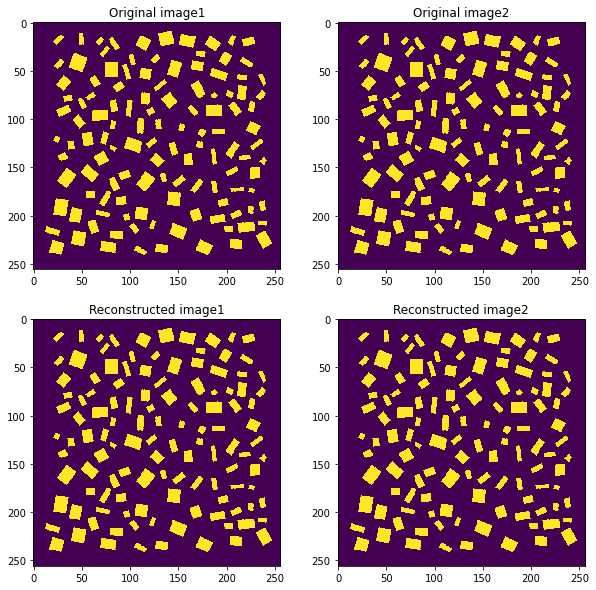

In [74]:
# Testing set



# dataP = samples_2steps[0]
dataP = concatenated_data[0]
# dataP = data[:2]
print(dataP.shape)

size_start = 0
size_end = 256

plt.figure()

f, axarr = plt.subplots(2,2, figsize=(10, 10))

sub1 = axarr[0][0].imshow(np.rot90(dataP[0, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][0].title.set_text('Original image1')

sub2 = axarr[0][1].imshow(np.rot90(dataP[0, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][1].title.set_text('Original image2')

data_rotated = np.rot90(dataP[:, size_start:size_end,size_start:size_end], 4).copy()

input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()
latent_space_output = autoencoder.encoder(input_data.view(1, 1, 256, 256))
print('latent space shape', latent_space_output.shape)
res = autoencoder(input_data.view(1, 1, 256, 256))
output_data = res.detach().numpy()
print(output_data.shape)

sub3 = axarr[1][0].imshow(output_data[0,0, :,:], interpolation='none')
axarr[1][0].title.set_text('Reconstructed image1')

sub4 = axarr[1][1].imshow(output_data[0,0, :,:], interpolation='none')
axarr[1][1].title.set_text('Reconstructed image2')

In [76]:
# Extract a region of interest and prepare it for input
data_rotated = np.rot90(concatenated_data[0,0,:,:], 1).copy()
input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()

# Pass the input through the encoder to get the latent variable
with torch.no_grad():
    latent_space_output = autoencoder.encoder(input_data)

print('Latent space shape:', latent_space_output.shape)

latent_space_output = latent_space_output.detach().numpy()
print(latent_space_output.shape)

Latent space shape: torch.Size([16, 64, 64])
(16, 64, 64)


In [80]:
np.save('/home/dg321/gitTest/PRI/irp/Flow_Data/Latent_data_Building_256_256.npy', latent_space_output)

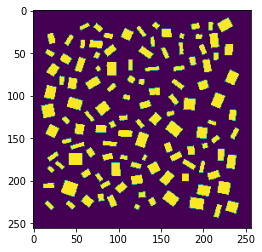

In [79]:
output = autoencoder.decoder(torch.from_numpy(latent_space_output).view(1, 16,64,64))
output = output.detach().numpy()
plt.imshow(output[0][0])

(2, 256, 256)
latent space shape torch.Size([1, 64, 64, 64])
(1, 2, 256, 256)


<Figure size 432x288 with 0 Axes>

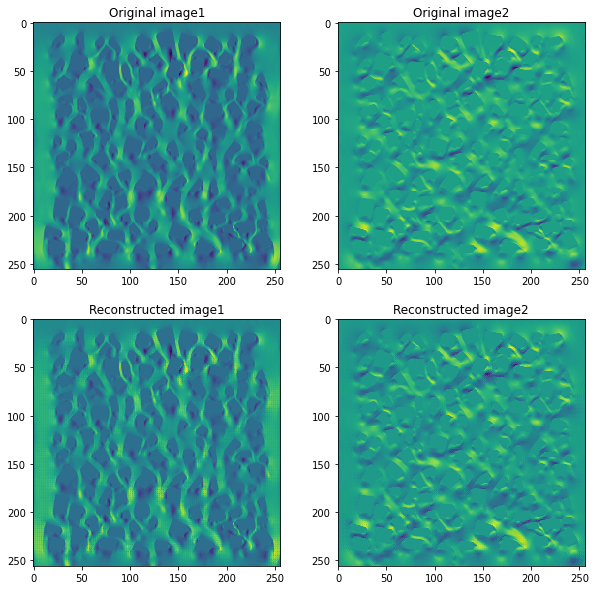

In [11]:
# Testing set



# dataP = samples_2steps[0]
dataP = concatenated_data[50]
# dataP = data[:2]
print(dataP.shape)

size_start = 0
size_end = 256

plt.figure()

f, axarr = plt.subplots(2,2, figsize=(10, 10))

sub1 = axarr[0][0].imshow(np.rot90(dataP[0, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][0].title.set_text('Original image1')

sub2 = axarr[0][1].imshow(np.rot90(dataP[1, size_start:size_end,size_start:size_end], 4), interpolation='none')
axarr[0][1].title.set_text('Original image2')

data_rotated = np.rot90(dataP[:, size_start:size_end,size_start:size_end], 4).copy()

input_data = torch.from_numpy(data_rotated).unsqueeze(0).float()
latent_space_output = autoencoder.encoder(input_data.view(1, 2, 256, 256))
print('latent space shape', latent_space_output.shape)
res = autoencoder(input_data.view(1, 2, 256, 256))
output_data = res.detach().numpy()
print(output_data.shape)

sub3 = axarr[1][0].imshow(output_data[0,0, :,:], interpolation='none')
axarr[1][0].title.set_text('Reconstructed image1')

sub4 = axarr[1][1].imshow(output_data[0,1, :,:], interpolation='none')
axarr[1][1].title.set_text('Reconstructed image2')

In [23]:
originalX = np.rot90(dataP[0, size_start:size_end,size_start:size_end], 4)
print(originalX.shape)
originalY = np.rot90(dataP[1, size_start:size_end,size_start:size_end], 4)
print(originalY.shape)

(256, 256)
(256, 256)


In [26]:
originalX_scaleback = scalerX.inverse_transform(originalX.reshape(1, -1))
originalX_scaleback = originalX_scaleback.reshape(256,256)
print(originalX_scaleback.shape)

(256, 256)


In [27]:
originalY_scaleback = scalerY.inverse_transform(originalX.reshape(1, -1))
originalY_scaleback = originalY_scaleback.reshape(256,256)
print(originalY_scaleback.shape)

(256, 256)


<Figure size 432x288 with 0 Axes>

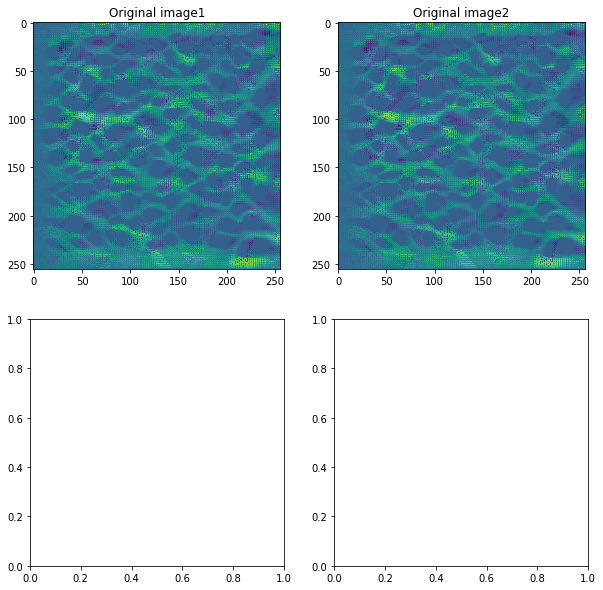

In [31]:
plt.figure()

f, axarr = plt.subplots(2,2, figsize=(10, 10))

sub1 = axarr[0][0].imshow(originalX_scaleback, interpolation='nearest')
axarr[0][0].title.set_text('Original image1')

sub2 = axarr[0][1].imshow(originalY_scaleback, interpolation='nearest')
axarr[0][1].title.set_text('Original image2')